<h1 style="text-align:center;"> Loan Approval Prediction </h1>


---


<h2 style="text-align:center;"> Presented By: </h2>
<h3 style="text-align:center;"> Georges Moussa: 62230250 </h3>
<h3 style="text-align:center;"> Clarita Antoun :92230521</h3>
<h2 style="text-align:center;"> CSCI441 - Machine Learning</h2>
<h2 style="text-align:center;"> Supervised by: Mr. Maher Abdul Rahman</h2>


---



# Table of Content:

#1.  [Introduction](#introduction)<br>
### &emsp; 1.1 [Dataset Legend](#datasetlegend)
### &emsp; 1.2 [Objective](#objective) <br>
  
# 2. [The DataSet](#dataset)
### &emsp; 2.1 [Used Packages](#packages) <br>
### &emsp; 2.2 [Data](#data) <br>
### &emsp; 2.3 [Data Understanding](#dataunderstanding) <br>

# 3. [Exploring the data](#eda)
### &emsp; 3.1 [Box plots for numeric columns](#box)
### &emsp; 3.2 [Bar plots for categorical columns](#bar)
### &emsp; 3.3 [Distribution according to the target](#distTar)
### &emsp; 3.4 [Correlation](#corr)
&emsp; &emsp; 3.4.1 [Converting categorical columns to numeric columns](#convert) <br>
&emsp; &emsp; 3.4.2 [Correlation Matrix](#matrix) <br>
&emsp; &emsp; 3.4.3 [Correlation with target Column](#corrTar)
# 4. [Data Pre-processing](#prePro)
### &emsp; 4.1 [Standardization](#stand)
# 5. [Data Modeling](#model)
### &emsp; 5.1 [Clarita's Algorithms](#clarita)
&emsp; &emsp; 5.1.1 [Decision Tree Classifier](#decision) <br>
&emsp; &emsp; 5.1.2 [Random Forest Classifier](#random)
### &emsp; 5.2 [George's Algorithms](#georges)
&emsp; &emsp; 5.2.1 [Gaussian Naive Bayes](#naive) <br>
&emsp; &emsp; 5.2.2 [KNearest Neighbors Classifier \(KNN\)](#knn)
# 6. [Models Evaluation](#evaluation)
# 7. [Conclusion](#conclusion)

---

<a id="introduction"></a>
# 1. Introduction
<a id="datasetlegend"></a>
## 1.1 Dataset Legend
1. person_age: Age of the loan applicant. <br><br>
2. person_gender: Gender of the applicant (male/female). <br><br>
3. person_education: Highest education level (e.g: High School, Bachelor, Master).<br><br>
4. person_income: Monthly or yearly income of the applicant.<br><br>
5. person_emp_exp: Employment experience in years.<br><br>
6. person_home_ownership: Housing status (e.g: RENT, OWN, MORTGAGE).<br><br>
7. loan_amnt: The amount of the loan requested.<br><br>
8. loan_intent: Purpose of the loan (e.g: MEDICAL, EDUCATION, PERSONAL).<br><br>
9. loan_int_rate: Interest rate of the loan.<br><br>
10. loan_percent_income: Percentage of income allocated to the loan.<br><br>
11. cb_person_cred_hist_length: Length of the applicant's credit history (in years).<br><br>
12. credit_score: Credit score of the applicant.<br><br>
13. previous_loan_defaults_on_file: Indicates if the applicant has defaulted on previous loans (Yes/No).<br><br>
---
<a id="objective"></a>
## 1.2 Objective
The process of loan approval is a critical aspect of financial institutions, as it directly impacts the institution's profitability and risk management. This project aims to analyze and visualize the patterns and trends in loan approval decisions.
<br><br>
The primary objective of this project is to identify the factors that influence loan approvals and uncover meaningful insights through data visualization. By analyzing the dataset variable, the project aims to understand the profiles of individuals most likely to have their loans approved.

----

<a id="dataset"></a>
# 2. The Dataset
<a id="packages"></a>
### &emsp; 2.1 Used Packages

2.1.1 NumPy: The Python package NumPy is used to manipulate arrays. Additionally, it has matrices, fourier transform, and functions for working in the area of linear algebra. In the year 2005, Travis Oliphant developed NumPy. You can use it for free because it is an open source project.

2.1.2 Pandas: Pandas is an open-source library designed primarily for working quickly and logically with relational or labeled data. It offers a range of data structures and procedures for working with time series and numerical data. The NumPy library serves as the foundation for this library. Pandas is quick and offers its users exceptional performance & productivity.

2.1.3 Matplotlib: is a complete package for building static, animated, and interactive visualizations in Python that supports 2D plotting. Matplotlib creates publication-quality figures in a range of physical formats and in cross-platform interactive settings. Python scripts, the Python and IPython shells, web application servers, and a number of graphical user interface toolkits can all use Matplotlib.

2.1.4 Seaborn: Python's Seaborn package allows you to create statistical visuals. It incorporates tightly with Pandas data structures and is built upon Matplotlib. You may examine and comprehend your data with Seaborn. Its charting functions work with dataframes and arrays that include entire datasets, and they internally carry out the semantic mapping and statistical aggregation required to make useful graphs. You may concentrate on the meaning of the various plot parts rather than the specifics of how to design them thanks to its dataset-oriented, declarative API.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id="data"></a>
### &emsp; 2.2 Data

In [41]:
df = pd.read_csv('/content/drive/MyDrive/CSCI441 - Project.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971,6,RENT,15000,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800,17,RENT,9000,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942,7,RENT,2771,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164,4,RENT,12000,EDUCATION,13.23,0.36,6,604,No,1


<a id="dataunderstanding"></a>
### &emsp; 2.3 Data Understanding

In [42]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [43]:
print("The Dataset Shape is: ",df.shape)

The Dataset Shape is:  (45000, 14)


Therefore the dataset consists of **45000 rows and 14 columns**

In [44]:
print("The Dataset Columns are:")
df_columns = df.columns.tolist()
for i in range(len(df_columns)):
  print(i+1,' - ',df_columns[i])

The Dataset Columns are:
1  -  person_age
2  -  person_gender
3  -  person_education
4  -  person_income
5  -  person_emp_exp
6  -  person_home_ownership
7  -  loan_amnt
8  -  loan_intent
9  -  loan_int_rate
10  -  loan_percent_income
11  -  cb_person_cred_hist_length
12  -  credit_score
13  -  previous_loan_defaults_on_file
14  -  loan_status


In [45]:
print("The number of null values in the following columns is:")
print(df.isnull().sum())

The number of null values in the following columns is:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


The Dataset has **no null values**, therefore we can skip the missing values handling step.

In case missing values were present, we can replace them by the mean for each column:
df['column_name'].fillna(df['column_name'].mean(),inplace=True)

**Value counts:**

In [46]:
df.value_counts()

person_age  person_gender  person_education  person_income  person_emp_exp  person_home_ownership  loan_amnt  loan_intent  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  previous_loan_defaults_on_file  loan_status
20          female         Associate         42674          0               RENT                   7000       MEDICAL      13.61          0.16                 2                           636           Yes                             0              1
29          female         Associate         53840          7               MORTGAGE               24000      MEDICAL      6.91           0.45                 8                           680           Yes                             0              1
                                             51488          7               RENT                   1600       VENTURE      19.16          0.03                 6                           526           Yes                             0              1
                                             51643          8               RENT                   15000      PERSONAL     14.25          0.29                 9                           511           No                              1              1
                                             52465          4               RENT                   1200       MEDICAL      11.43          0.02                 6                           656           Yes                             0              1
                                                                                                                                                                                                                                                       ..
24          male           High School       60838          0               RENT                   15000      MEDICAL      6.92           0.25                 3                           558           Yes                             0              1
                                                            5               RENT                   8000       EDUCATION    7.96           0.13                 4                           560           Yes                             0              1
                                             60860          0               RENT                   8000       PERSONAL     15.39          0.13                 3                           612           Yes                             0              1
                                             60883          1               MORTGAGE               3000       EDUCATION    7.66           0.05                 2                           638           Yes                             0              1
144         male           Bachelor          300616         125             RENT                   4800       VENTURE      13.57          0.02                 3                           789           No                              0              1
Name: count, Length: 45000, dtype: int64

In [47]:
print("The number of duplicated values is: ",df.duplicated().sum())

The number of duplicated values is:  0


The Dataset has **no duplicate values**, therefore we can skip the duplicated values handling step.
In case duplicate values were present, we drop them:
df.drop_duplicates(axis=0,inplace=True)


**Our dataset is clean from missing and duplicated values.**

In [48]:
print("Information of the dataset:")
print(df.info())

Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  prev

In [50]:
print("The Dataset Types are:")
print(df.dtypes)

The Dataset Types are:
person_age                          int64
person_gender                      object
person_education                   object
person_income                       int64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                           int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


We can conclude that the Dataset **has numeric and categorical columns**:
1. person_age: int64 -> ***numeric***
2. person_gender: object -> ***categorical***
3. person_education: object -> ***categorical***
4. person_income: int64 -> ***numeric***
5. person_emp_exp: int64 -> ***numeric***
6. person_home_ownership: object -> ***categorical***
7. loan_amnt: int64 -> ***numeric***
8. loan_intent: object -> ***categorical***
9. loan_int_rate: float64: ***numeric***
10. loan_percent_income: float64 -> ***numeric***
11. cb_person_cred_hist_length: int64 -> ***numeric***
12. credit_score: int64 -> ***numeric***
13. previous_loan_defaults_on_file: object -> ***categorical***
14. loan_status: int64 -> numeric but values are 0 or 1 -> ***categorical*** (***TARGET***)

What should we do? <br>
**We should  encode the categorical columns into numerical columns.**




In [51]:
print("Unique Data in column 'person_gender':",df['person_gender'].unique())
print("The most frequent gender is:",df['person_gender'].mode().tolist())
print("----------------------------------")
print("Unique Data in column 'previous_loan_defaults_on_file':",df['previous_loan_defaults_on_file'].unique())
print("Most people in the dataset have defaulted on previous loans:",df['previous_loan_defaults_on_file'].mode().tolist())
print("----------------------------------")
print("Unique Data in column 'person_education':",df['person_education'].unique())
print("The most frequent type of education is:",df['person_education'].mode().tolist())
print("----------------------------------")
print("Unique Data in column 'person_home_ownership':",df['person_home_ownership'].unique())
print("The most frequent type of home ownership is:",df['person_home_ownership'].mode().tolist())
print("----------------------------------")
print("Unique Data in column 'loan_intent':",df['loan_intent'].unique())
print("The most frequent intention of loans is:",df['loan_intent'].mode().tolist())

Unique Data in column 'person_gender': ['female' 'male']
The most frequent gender is: ['male']
----------------------------------
Unique Data in column 'previous_loan_defaults_on_file': ['No' 'Yes']
Most people in the dataset have defaulted on previous loans: ['Yes']
----------------------------------
Unique Data in column 'person_education': ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
The most frequent type of education is: ['Bachelor']
----------------------------------
Unique Data in column 'person_home_ownership': ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
The most frequent type of home ownership is: ['RENT']
----------------------------------
Unique Data in column 'loan_intent': ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
The most frequent intention of loans is: ['EDUCATION']


In [52]:
print("The Dataset Description is:")
print(df.describe())

The Dataset Description is:
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.0000

#Hypothesis: Probable and Possible Outliers:
### Possible Outlier: Most likely an outlier
### Probable Outlier: May be an outlier
1. Age: The minimum is 20, the maximum is 144 which is also a lot higher than the age mean (27 years), 144 years seems illogical => **Possible Outlier**
2. Person Income: The maximum is 7,200,766 which is significantly greater than the income mean (80,319), the maximum value seems illogical => **Possible Outlier**
3. Person Experience: The maximum is 125 years which is logically inaccurate + it is significantly greater than the mean => ***Possible Outlier***
4. Loan Amount: 75-th Percentile indicates 12237, which means that 75% of the data is 12237 or below, however the maximum value is 35000, however the maximum value seems => ***Probable Outlier***
5. We could probably say the same for the percentage of income allocated to the loan (75th percentile: 0.19, maximum: 0.66) => ***Possible Outlier***
6. Length of the applicant's credit history: the mean is 5.87 years, the 75% of the values fall below 8, but the maximum is 30 => ***Probable Outlier***

Probable Outliers - Why?
1. We can say that Loan amount may have outliers, but not necessarly, because 35000$ for a loan seems reasonable and logical, even if it means that it is messing our data (although it will be dealt with later)
2. For the applicant's credit history length, maximum of 30 years is also reasonable according to the persons age, 30 years of credit experience is not illogical.

<b>After plotting the numeric columns, we may confirm these outliers</b>

<a id="eda"></a>
# 3 Exploring the Data
<a id="box"></a>
### &emsp; 3.1 Box Plots for numeric columns

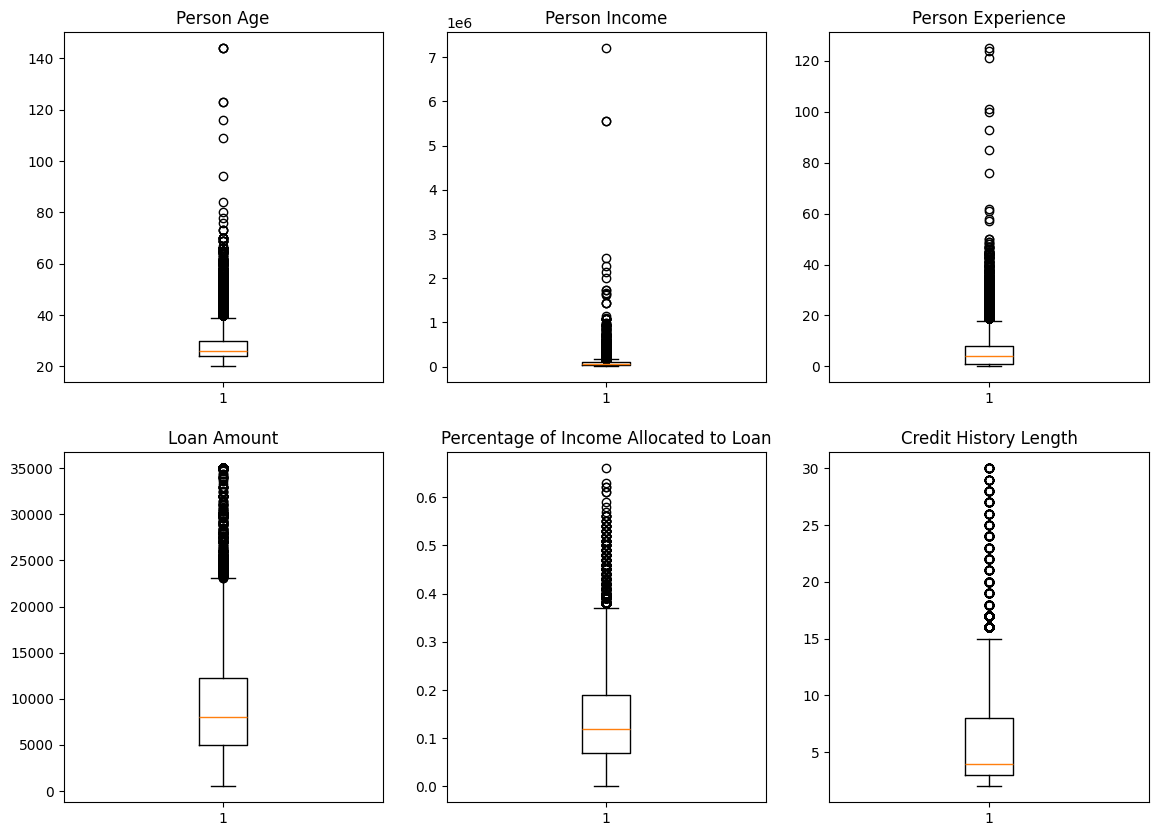

In [54]:
plt.figure(figsize=(14,10))
plt.subplot(231)
plt.boxplot(df['person_age'])
plt.title("Person Age")
plt.subplot(232)
plt.boxplot(df['person_income'])
plt.title("Person Income")
plt.subplot(233)
plt.boxplot(df['person_emp_exp'])
plt.title("Person Experience")
plt.subplot(234)
plt.boxplot(df['loan_amnt'])
plt.title("Loan Amount")
plt.subplot(235)
plt.boxplot(df['loan_percent_income'])
plt.title("Percentage of Income Allocated to Loan")
plt.subplot(236)
plt.boxplot(df['cb_person_cred_hist_length'])
plt.title("Credit History Length")
plt.show()

# Conclusion of the previous Hypothesis:
1. **Person Age** indeed has outliers.
2. **Person Income** indeed has outliers.
3. **Person Experience** indeed has outliers.
4. **Loan Amount** indeed has outliers.
5. **Income Percentage Allocated to Loan** indeed has outliers.
6. **Credit History Length** indeed has outliers.


<a id="bar"></a>
### &emsp; 3.2 Bar plots for categorical columns

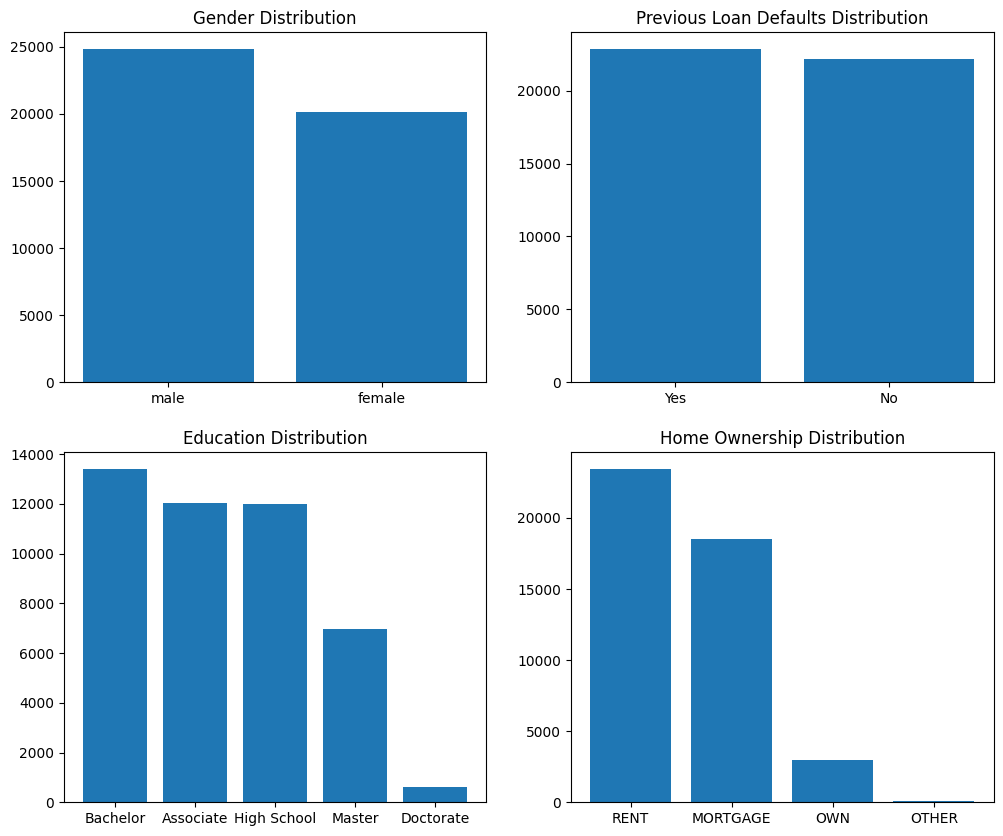

In [55]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.bar(df['person_gender'].value_counts().index,df['person_gender'].value_counts())
plt.title("Gender Distribution")
plt.subplot(222)
plt.bar(df['previous_loan_defaults_on_file'].value_counts().index,df['previous_loan_defaults_on_file'].value_counts())
plt.title("Previous Loan Defaults Distribution")
plt.subplot(223)
plt.bar(df['person_education'].value_counts().index,df['person_education'].value_counts())
plt.title("Education Distribution")
plt.subplot(224)
plt.bar(df['person_home_ownership'].value_counts().index,df['person_home_ownership'].value_counts())
plt.title("Home Ownership Distribution")
plt.show()

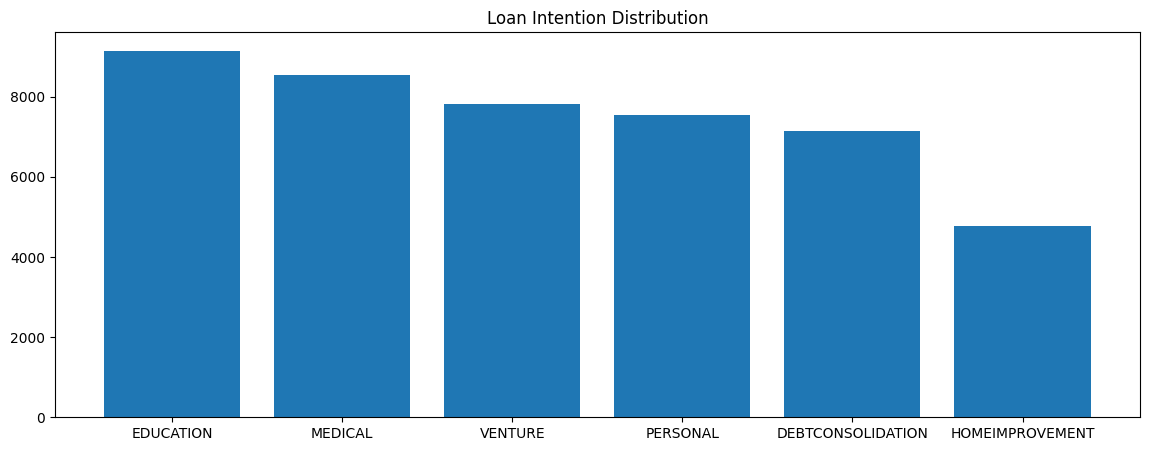

In [56]:
plt.figure(figsize=(14,5))
plt.subplot(111)
plt.bar(df['loan_intent'].value_counts().index,df['loan_intent'].value_counts())
plt.title("Loan Intention Distribution")
plt.show()

<a id="distTar"></a>
### &emsp; 3.3 Distribution around the target
<b>We will visualize the distribution of some cateforical columns around the target column</b>

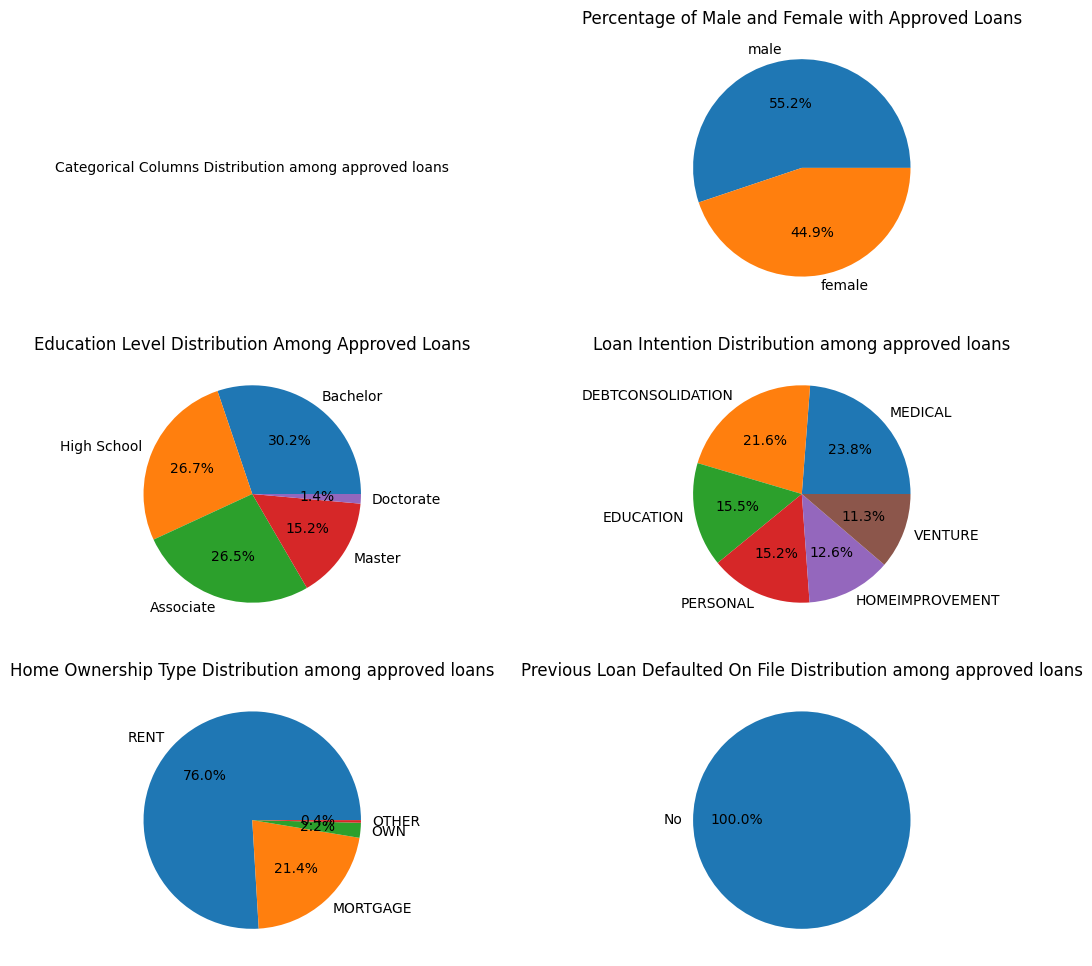

In [57]:
approved_loans = df[df['loan_status'] == 1]

gender_distribution = approved_loans['person_gender'].value_counts()
education_distribution = approved_loans['person_education'].value_counts()
intention_distribution = approved_loans['loan_intent'].value_counts()
ownership_distribution = approved_loans['person_home_ownership'].value_counts()
previous_defaults_distribution =  approved_loans['previous_loan_defaults_on_file'].value_counts()
plt.figure(figsize=(13, 12))
plt.subplot(321)
plt.axis('off')
plt.text(0.5,0.5,"Categorical Columns Distribution among approved loans",ha="center",va="center")
plt.subplot(322)
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title("Percentage of Male and Female with Approved Loans")
plt.subplot(323)
plt.pie(education_distribution, labels=education_distribution.index, autopct='%1.1f%%')
plt.title("Education Level Distribution Among Approved Loans")
plt.subplot(324)
plt.pie(intention_distribution, labels=intention_distribution.index, autopct='%1.1f%%')
plt.title("Loan Intention Distribution among approved loans")
plt.subplot(325)
plt.pie(ownership_distribution, labels=ownership_distribution.index, autopct='%1.1f%%')
plt.title("Home Ownership Type Distribution among approved loans")
plt.subplot(326)
plt.pie(previous_defaults_distribution, labels=previous_defaults_distribution.index, autopct='%1.1f%%')
plt.title("Previous Loan Defaulted On File Distribution among approved loans")
plt.show()

Prominent Observations on Approved Loans:
1. Mostly people who rent houses are approved for loans
2. Only people who have no previous loans are approved for loans.

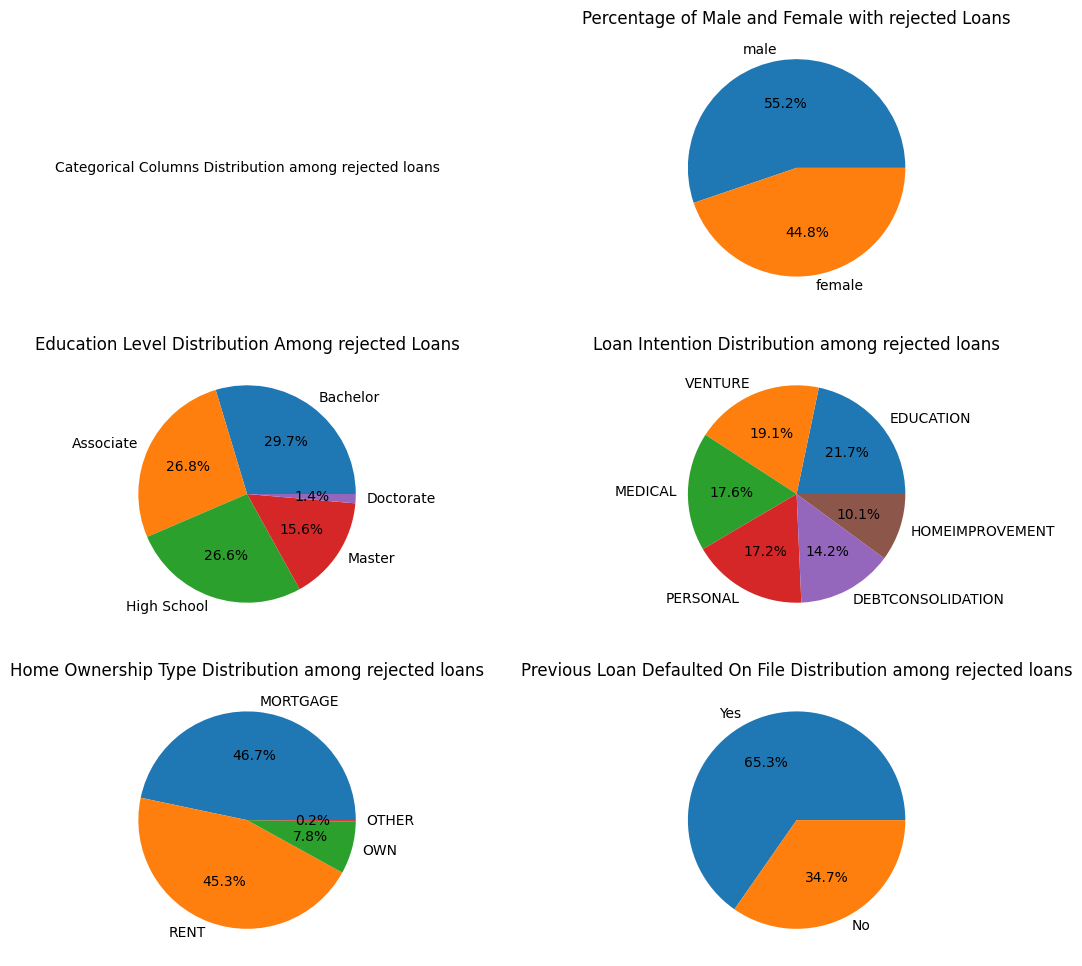

In [61]:
rejected_loans = df[df['loan_status'] == 0]

gender_distribution = rejected_loans['person_gender'].value_counts()
education_distribution = rejected_loans['person_education'].value_counts()
intention_distribution = rejected_loans['loan_intent'].value_counts()
ownership_distribution = rejected_loans['person_home_ownership'].value_counts()
previous_defaults_distribution =  rejected_loans['previous_loan_defaults_on_file'].value_counts()
plt.figure(figsize=(13, 12))
plt.subplot(321)
plt.axis('off')
plt.text(0.5,0.5,"Categorical Columns Distribution among rejected loans",ha="center",va="center")
plt.subplot(322)
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title("Percentage of Male and Female with rejected Loans")
plt.subplot(323)
plt.pie(education_distribution, labels=education_distribution.index, autopct='%1.1f%%')
plt.title("Education Level Distribution Among rejected Loans")
plt.subplot(324)
plt.pie(intention_distribution, labels=intention_distribution.index, autopct='%1.1f%%')
plt.title("Loan Intention Distribution among rejected loans")
plt.subplot(325)
plt.pie(ownership_distribution, labels=ownership_distribution.index, autopct='%1.1f%%')
plt.title("Home Ownership Type Distribution among rejected loans")
plt.subplot(326)
plt.pie(previous_defaults_distribution, labels=previous_defaults_distribution.index, autopct='%1.1f%%')
plt.title("Previous Loan Defaulted On File Distribution among rejected loans")
plt.show()


Prominent Observations on Rejected Loans:
1. Mostly people whis mortgage are rejected for loans
2. Mostly people who have  previous loans are rejected for loans.

<a id="corr"></a>
### &emsp; 3.4 Correlation
<a id="convert"></a>
&emsp; &emsp; 3.4.1 Converting categorical columns to numeric columns

In [62]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(df, columns=['person_gender','previous_loan_defaults_on_file'],drop_first=False, dtype=int)
labelling=LabelEncoder()
df['person_education_new']=labelling.fit_transform(df['person_education'])
df['person_home_ownership_new']=labelling.fit_transform(df['person_home_ownership'])
df['loan_intent_new']=labelling.fit_transform(df['loan_intent'])
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,person_gender_male,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,person_education_new,person_home_ownership_new,loan_intent_new
0,22,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,1,1,0,1,0,4,3,4
1,21,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,0,1,0,0,1,3,2,1
2,25,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,1,1,0,1,0,3,0,3
3,23,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,1,1,0,1,0,1,3,3
4,24,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,1,0,1,1,0,4,3,3


In [63]:
df.drop(columns=['person_education','person_home_ownership','loan_intent'],inplace = True)
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,person_gender_male,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,person_education_new,person_home_ownership_new,loan_intent_new
0,22,71948,0,35000,16.02,0.49,3,561,1,1,0,1,0,4,3,4
1,21,12282,0,1000,11.14,0.08,2,504,0,1,0,0,1,3,2,1
2,25,12438,3,5500,12.87,0.44,3,635,1,1,0,1,0,3,0,3
3,23,79753,0,35000,15.23,0.44,2,675,1,1,0,1,0,1,3,3
4,24,66135,1,35000,14.27,0.53,4,586,1,0,1,1,0,4,3,3


<a id="matrix"></a>
&emsp; &emsp; 3.4.2 Correlation Matrix

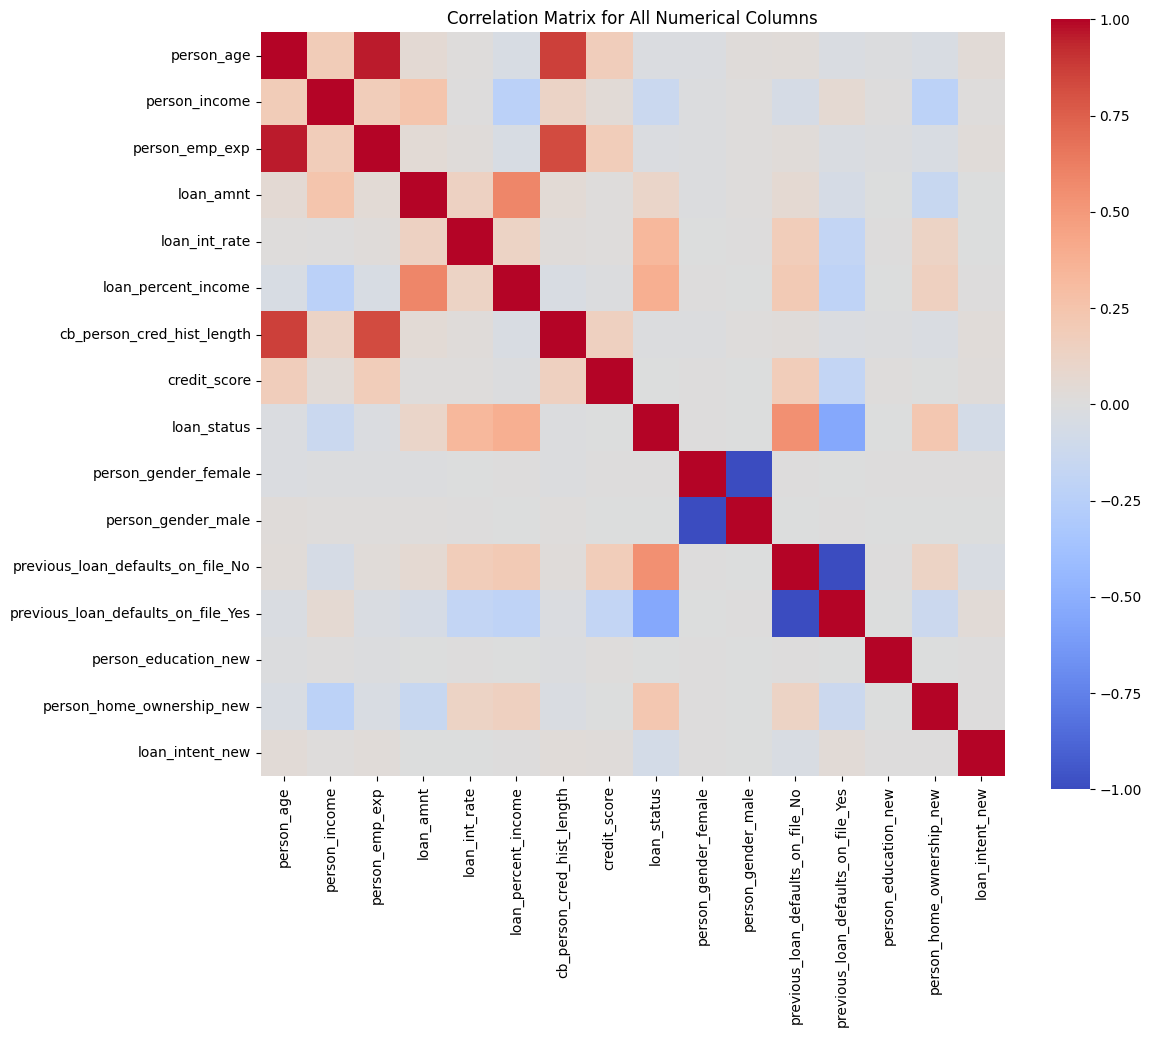

In [64]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for All Numerical Columns')
plt.show()


<a id="corrTar"></a>
&emsp; &emsp; 3.4.3 Correlation with target Column

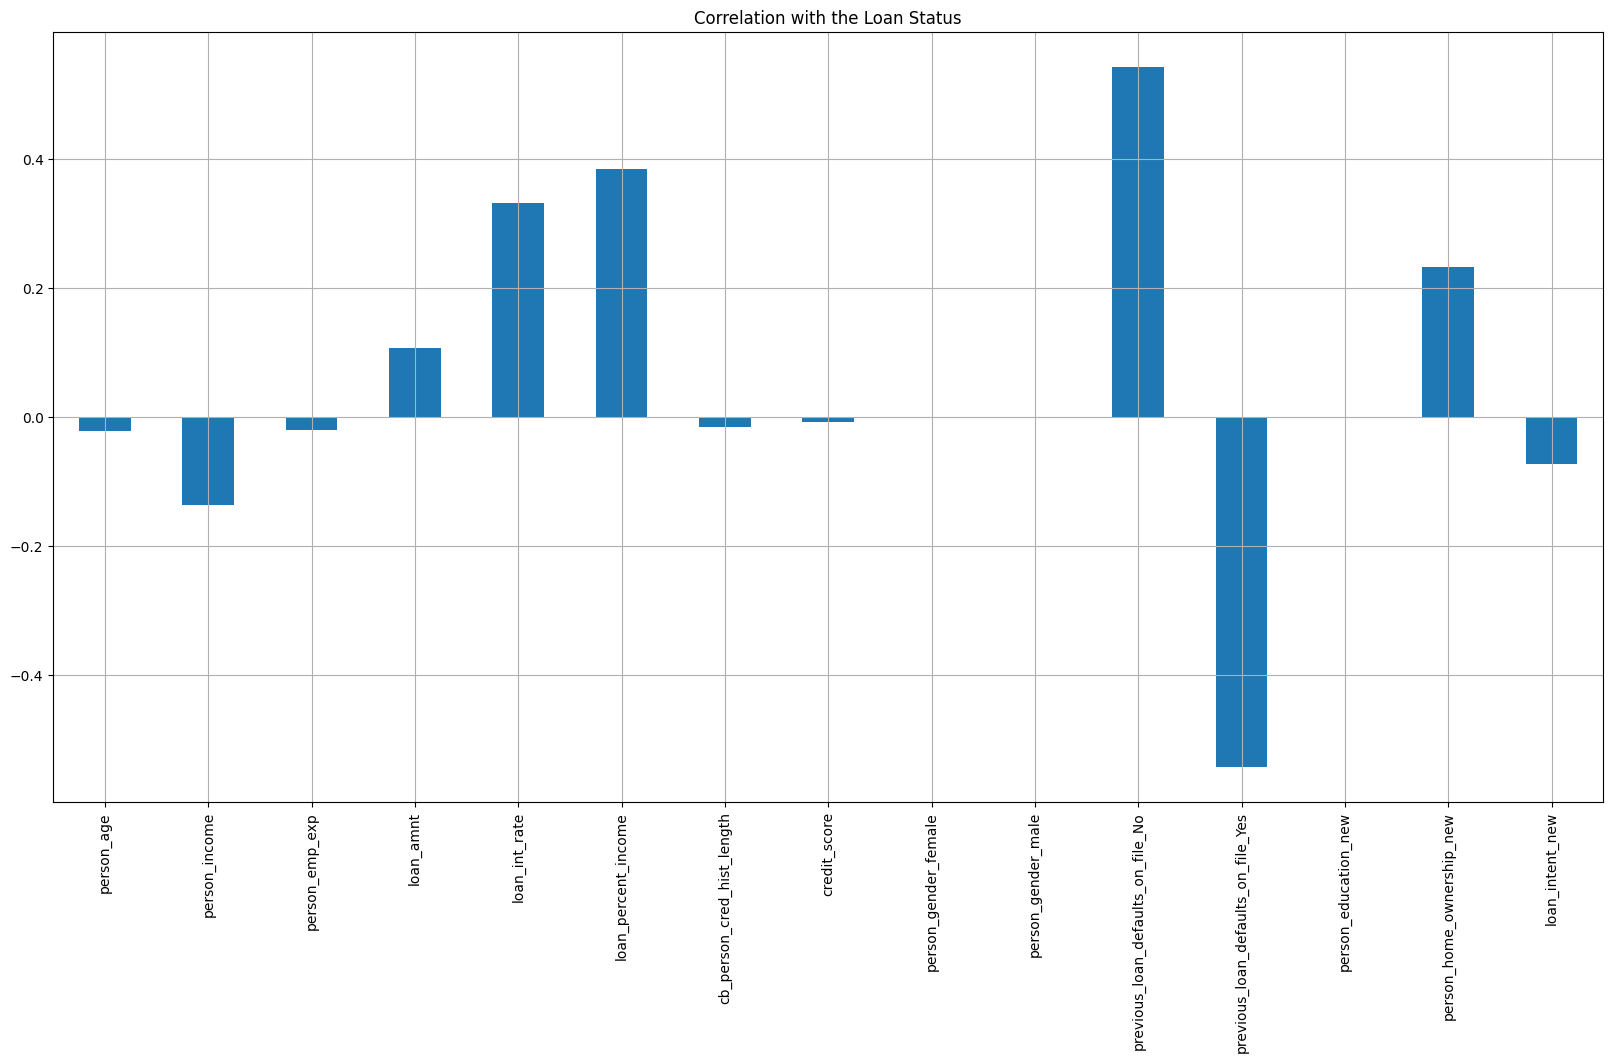

In [65]:
df.drop('loan_status', axis=1).corrwith(df['loan_status']).plot(kind='bar',grid=True,figsize=(20, 10),title="Correlation with the Loan Status")
plt.show()


<a id="prePro"></a>
# 4. Data Pre-processing
<a id="stand"></a>
### &emsp; 4.1 Standardization

For this section we need to split the data into 2: categorical and numerical. Because categorical columns may affect the scaling process

In [66]:
from sklearn.preprocessing import StandardScaler
categorical = ['person_gender_female', 'person_gender_male', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes', 'person_education_new', 'person_home_ownership_new', 'loan_intent_new']
numeric = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

print(categorical)
print(numeric)

scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])

['person_gender_female', 'person_gender_male', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes', 'person_education_new', 'person_home_ownership_new', 'loan_intent_new']
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


After standardization, the expected standard deviation for the scaled columns (the numeric columns) should be around 1

In [67]:
print(df[numeric].std())

person_age                    1.000011
person_income                 1.000011
person_emp_exp                1.000011
loan_amnt                     1.000011
loan_int_rate                 1.000011
loan_percent_income           1.000011
cb_person_cred_hist_length    1.000011
credit_score                  1.000011
dtype: float64


<b>We can see that the standard deviation for the numeric columns is approximately 1, the standardization process is now complete</b>

<a id="model"></a>
# 5. Data Modeling
<a id="clarita"></a>
### &emsp; 5.1 Clarita's Algorithms
&emsp; &emsp; 5.1.1 Decision Tree Classifier <br>
&emsp; &emsp; 5.1.2 Random Forest Classifier

<a id="decision"></a>
5.1.1. Decision Tree

In [70]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns='loan_status')
y=df['loan_status']

X_train,X_test,y_train,y_test=train_test_split(X ,y,test_size=0.3,random_state=42)
decision_model=DecisionTreeClassifier()
start_time1 = datetime.now()
decision_model.fit(X_train,y_train)
decision_pred=decision_model.predict(X_test)
end_time1 = datetime.now()
execution_time1 = end_time1 - start_time1
print("Execution time for Decision Tree: ",execution_time1)

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
accuracy_decision = accuracy_score(y_test, decision_pred)
print("Accuracy for decision tree: ",accuracy_decision)
f1 = f1_score(y_test, decision_pred, average='weighted')
print("F1 Score for decision tree: ",f1)
print("\nClassification Report for decision tree:")
print(classification_report(y_test, decision_pred))
cm = confusion_matrix(y_test, decision_pred)
print("\nConfusion Matrix for decision tree:")
print(cm)

Execution time for Decision Tree:  0:00:00.162746
Accuracy for decision tree:  0.8953333333333333
F1 Score for decision tree:  0.8955365069319322

Classification Report for decision tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.76      0.77      0.77      3007

    accuracy                           0.90     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.90      0.90      0.90     13500


Confusion Matrix for decision tree:
[[9770  723]
 [ 690 2317]]


<a id="random"></a>
5.1.2. Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
randF=RandomForestClassifier()

start_time2 = datetime.now()
randF.fit(X_train,y_train)
randF_pred=randF.predict(X_test)

end_time2 = datetime.now()

execution_time2 = end_time2 - start_time2
print("Random Forest's Execution Time: ",execution_time2)
accuracy_randF = accuracy_score(y_test, randF_pred)
print("Accuracy for Random Forest: ",accuracy_randF)
f1 = f1_score(y_test, randF_pred, average='weighted')
print("F1 Score for  Random Forest: ",f1)
print("\nClassification Report for Random Forest :")
print(classification_report(y_test, randF_pred))
cm = confusion_matrix(y_test, randF_pred)
print("\nConfusion Matrix for Random Forest :")
print(cm)

Random Forest's Execution Time:  0:00:05.072631
Accuracy for Random Forest:  0.9228888888888889
F1 Score for  Random Forest:  0.921187811306345

Classification Report for Random Forest :
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.87      0.77      0.82      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.87      0.88     13500
weighted avg       0.92      0.92      0.92     13500


Confusion Matrix for Random Forest :
[[10143   350]
 [  691  2316]]


<a id="georges"></a>
### &emsp; 5.2 George's Algorithms
&emsp; &emsp; 5.2.1 Gaussian Naive Bayes <br>
&emsp; &emsp; 5.2.2 KNearest Neighbors Classifier (KNN)

<a id="naive"></a>
5.2.1. Gaussian Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
naiveB = GaussianNB()
start_time3 = datetime.now()
naiveB.fit(X_train,y_train)
naiveB_pred=naiveB.predict(X_test)
end_time3 = datetime.now()
execution_time3 = end_time3 - start_time3
print("Naive Bayes Execution Time: ",execution_time3)
accuracy_naive = accuracy_score(y_test, naiveB_pred)
print("Accuracy for Naive Bayes: ",accuracy_naive)
f1 = f1_score(y_test, naiveB_pred, average='weighted')
print("F1 Score for  Naive Bayes: ",f1)
print("\nClassification Report for Naive Bayes :")
print(classification_report(y_test, naiveB_pred))
cm = confusion_matrix(y_test, naiveB_pred)
print("\nConfusion Matrix for Naive Bayes :")
print(cm)

Naive Bayes Execution Time:  0:00:00.041577
Accuracy for Naive Bayes:  0.7315555555555555
F1 Score for  Naive Bayes:  0.7540183409869049

Classification Report for Naive Bayes :
              precision    recall  f1-score   support

           0       1.00      0.66      0.79     10493
           1       0.45      1.00      0.62      3007

    accuracy                           0.73     13500
   macro avg       0.73      0.83      0.71     13500
weighted avg       0.88      0.73      0.75     13500


Confusion Matrix for Naive Bayes :
[[6877 3616]
 [   8 2999]]


<a id="knn"></a>
5.2.2. KNearest Neighbors Classifier (KNN)

<b>We first find the best number of neighbors</b>

In [76]:
from sklearn.neighbors import KNeighborsClassifier
max_k = min(15, len(X_train))
best_accuracy = 0
best_k = 0
accuracy_values = []
k_values = []
for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_k=k
print(best_k)

15


<b>The Best Number Of Neighbors Is 15</b>

In [79]:
knn = KNeighborsClassifier(n_neighbors=best_k)
start_time4 = datetime.now()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
end_time4= datetime.now()
execution_time4 = end_time4 - start_time4
print("KNN Execution Time: ",execution_time4)
accuracy_KNN = accuracy_score(y_test, knn_pred)
print("Accuracy for KNN: ",accuracy_KNN)
f1 = f1_score(y_test, knn_pred, average='weighted')
print("F1 Score for  KNN: ",f1)
print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_pred))
cm = confusion_matrix(y_test, knn_pred)
print("\nConfusion Matrix for KNN:")
print(cm)

KNN Execution Time:  0:00:08.495732
Accuracy for KNN:  0.8951111111111111
F1 Score for  KNN:  0.891703296252655

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10493
           1       0.82      0.68      0.74      3007

    accuracy                           0.90     13500
   macro avg       0.86      0.82      0.84     13500
weighted avg       0.89      0.90      0.89     13500


Confusion Matrix for KNN:
[[10027   466]
 [  950  2057]]


<a id="evaluation"></a>
# 6. Models Evaluation

Comparison based on accuracy:

In [80]:
print(accuracy_decision)
print(accuracy_randF)
print(accuracy_naive)
print(accuracy_KNN)

0.8953333333333333
0.9228888888888889
0.7315555555555555
0.8951111111111111


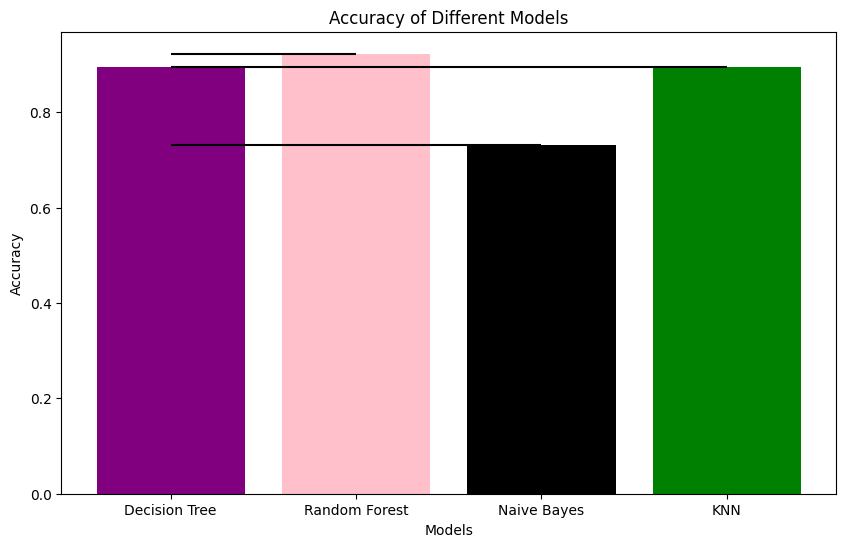

In [81]:
x_axis = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN']
y_axis = [accuracy_decision, accuracy_randF, accuracy_naive, accuracy_KNN]

plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color=['purple', 'pink', 'black', 'green'])
for i in range(len(y_axis)):
    plt.hlines(y_axis[i],0,x_axis[i],"black")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

<a id="conclusion"></a>
# 7. Conclusion

* KNearest Neighbors Classifier and Decision Tree Classifier give almost the same results.
* Random Forest Classifier is the most accurate.
* Naive Bayes is the least accurate.
* Having no previous loans is cruicial for loan approval.

